In [3]:
import numpy
import random
from scipy import stats
import csv
import pandas

no_of_traces = 100

def hw(int_no):
    # Write Code to calculate the number of ones in a byte...
    c = 0
    while(int_no):
        int_no &= (int_no-1)
        c += 1
    return c

Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

# Here, we generate random values for first byte of plaintext...
#  This is the array containing first byte of all the plaintexts...
random_plaintext_first_bytes = []

for random_byte in range(0,no_of_traces):
    random_plaintext_first_bytes.append(random.randint(0,255))

print("\nFirst byte of plaintexts.... This is the array containing first byte of all the plaintexts...\n")
print(random_plaintext_first_bytes)

# Now, let us try to build a model for all possible values of key byte using the plaintext inputs...

# Let a given first plaintext byte be denoted as x... For each first plaintext byte x, try to calculate Sbox(x xor k) where k is the first key byte...
# For example, let us build a model for k = 0x20...

# Sbox(x xor k)

key = 0x00
leaky_sbox_output_value_array = []
print("\n\nValue of Leaky Sbox values for first plaintext byte....\n")

# Write Code to fill up the leaky_sbox_output_value_array with Sbox(x xor k).

for byte_pos in range(0,no_of_traces):
    byte_now = random_plaintext_first_bytes[byte_pos] ^ key
    Sbox_output_leaky_value = Sbox[byte_now]
    leaky_sbox_output_value_array.append(Sbox_output_leaky_value)

print(leaky_sbox_output_value_array)

# Now, we know these are the leaky values... How do these values leak through the power side-channel... They leak as their hamming weights... So, we need to
# calculate the hamming weight of these leaky values...

# Write Code to fill up the hamming_weight_of_leaky_sbox_bytes with HW(Sbox(x xor k))...

hamming_weight_of_leaky_sbox_bytes = []
print("\n\nHamming Weight of Leaky Sbox values for first plaintext byte....\n")

for byte in range(0,no_of_traces):
    hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

print(hamming_weight_of_leaky_sbox_bytes)
print("\n")

print("should be 100 traces for 100 plaintexts, remember we are trying out for one possible value of the key byte here\n")
print(len(hamming_weight_of_leaky_sbox_bytes))
print("\n")

# hamming_weight_of_leaky_sbox_bytes is your hypothetical Power Model for k = 20...

# But, as an attacker you do not know what is the value of k, then you try to build a model for all values of k...

# Write Code to build a hypothetical power model for all values of k... This is called a power model matrix...

# no_of_possible_values_of_key_byte = 256
# power_model_matrix = [[]]*no_of_possible_values_of_key_byte

# print(power_model_matrix)


First byte of plaintexts.... This is the array containing first byte of all the plaintexts...

[161, 138, 51, 148, 241, 89, 1, 170, 129, 191, 108, 105, 69, 112, 78, 105, 90, 150, 45, 109, 163, 162, 115, 151, 33, 135, 104, 32, 70, 192, 86, 199, 147, 209, 126, 18, 179, 73, 86, 11, 153, 119, 46, 76, 15, 159, 253, 233, 236, 124, 96, 83, 97, 91, 32, 213, 213, 93, 169, 107, 80, 53, 202, 60, 209, 186, 86, 179, 97, 205, 0, 130, 237, 189, 27, 124, 181, 50, 44, 119, 20, 109, 11, 203, 149, 47, 235, 211, 180, 45, 2, 250, 51, 101, 1, 163, 75, 219, 205, 97]


Value of Leaky Sbox values for first plaintext byte....

[50, 126, 195, 34, 161, 203, 124, 172, 12, 8, 80, 249, 110, 81, 47, 249, 190, 144, 216, 60, 10, 58, 143, 136, 253, 23, 69, 183, 90, 186, 177, 198, 220, 62, 243, 201, 109, 59, 177, 43, 238, 245, 49, 41, 118, 219, 84, 30, 206, 16, 208, 237, 239, 57, 183, 3, 3, 76, 211, 127, 83, 150, 116, 235, 62, 244, 177, 109, 239, 189, 99, 19, 85, 122, 175, 16, 213, 35, 113, 245, 250, 60, 43, 31, 42, 21,

In [57]:
##############################################################################################

# csvfile = list(csv.reader(open("ownwaveform.csv")))
# print(csvfile)

print("testing area\n")
test_colone = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
test_coltwo = [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]

# should print 0.7586402890911867
print(stats.pearsonr(test_colone,test_coltwo)[0])

##############################################################################################

# print(stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4]))

testing area

0.7586402890911869


In [87]:
# pandas.options.display.max_rows = 9999

df = pandas.read_csv('anotherownwaveform.csv')
# dfptct = df.column

# print(df.columns)
# print(df[["PT","CT"]])
# print(df)
print(df.iloc[0,0])
print(df.shape)
print(df.iloc[99,2501])
# print("0x" + df.iloc[0,0][:2])

print(df.iloc[0,0][2:4])
# firsttmp = "0x" + df.iloc[0,0][:2]
# print(type(firsttmp))
# print(firsttmp)
# secondtmp = int(firsttmp, 16)
# print(type(secondtmp))
# print(secondtmp)

testtmp = "0xFF"
print(int(testtmp,16))
print(int(testtmp,16) ^ 255)

4535012C2AA23184078DB344F6B2402C
(100, 2502)
0.316
35
255
0


In [160]:
# arguments: key byte index (plaintext byte index) you want to build a power model for
# for this index, for each of the 100 plaintexts, xor each corresponding plaintext byte with 256 possible key bytes
# return a 256x100 power model M for that plaintext byte

# byteindex ranges from 0 to 15
def powermodelgenerator(byteindex):
    byteindex *= 2
    singleresultrow = []
    resultpowermodel = []
    
    # key ranges from 0 to 255
    for key in range(0x00,0x100):
        for i in range(0,100):
            tmp = "0x" + df.iloc[i,0][byteindex:byteindex+2]
            tmpagain = int(tmp,16) ^ key
            tmpfinal = Sbox[tmpagain]
            singleresultrow.append(hw(tmpfinal))
        resultpowermodel.append(singleresultrow)
        singleresultrow = []
        
    return resultpowermodel

m = powermodelgenerator(0)
# print(m[0][0])
# print(m[1][0])
# print(m[2][0])
# print(m[99])
# print(0xFD ^ 0x56)
print(bin(Sbox[0xFD ^ 0x56]))
print(m[253][99])
print(Sbox[0xFE ^ 0x56])
print(m[254][99])
print(bin(Sbox[0xFF ^ 0x56]))
print(m[255][99])
print(Sbox[0xAA ^ 0xF8])
print(m[170][5])

# mtwo = powermodelgenerator(15)
# print(mtwo[0][0])
# print(0x2C ^ 0x00)
# print(mtwo[1][0])
        
#     byte_now = random_plaintext_first_bytes[byte_pos] ^ key
#     Sbox_output_leaky_value = Sbox[byte_now]
#     leaky_sbox_output_value_array.append(Sbox_output_leaky_value)

0b1100010
3
194
3
0b11010011
5
0
0


In [177]:
# m is a 256 times 100 power model: m[0 to 255][0 to 99]
# time to correlate each m[0] to m[255] with each df.iloc[:,2] to df.iloc[:,2501]
# power traces captured in lab t ranges from df.iloc[:,2] to df.iloc[:,2501]

# print(m)
# print(df.iloc[:,2501])
print(len(m[0]))
print(len(df.iloc[:,2]))
print(stats.pearsonr([1,2,3],[1,2,3]))
print(stats.pearsonr([1,2,3],[0.1,0.2,0.3]))
print(stats.pearsonr(m[0],df.iloc[:,2])[0])
print(abs(stats.pearsonr(m[0],df.iloc[:,2])[0]))

# arguments: powermodel we built earlier
def correlationmatrixgenerator(powermodel):
    singleresultrow = []
    correlationmatrix = []
    
    for i in range(0,256):
        for j in range(2,2502):
            singleresultrow.append(abs(stats.pearsonr(m[i],df.iloc[:,j])[0]))
        correlationmatrix.append(singleresultrow)
        singleresultrow = []
    
    return correlationmatrix

correlationmatrix = correlationmatrixgenerator(m)

100
100
(0.9999999999999998, 1.3415758552508151e-08)
(0.9999999999999998, 1.3415758552508151e-08)
-0.35835136157183556
0.35835136157183556


In [190]:
print(len(correlationmatrix))
print(len(correlationmatrix[255]))
# print(correlationmatrix[255])

# time to find the highest correlation value in each row of correlationmatrix, so 256 highest values
highestvaluearray = []
for row in correlationmatrix:
    highestvaluearray.append(max(row))

print(len(highestvaluearray))
print(max(highestvaluearray))
print(highestvaluearray)

256
2500
256
0.7469190510872585
[0.35835136157183556, 0.3374699078418809, 0.2651517392699094, 0.34978863741553, 0.24014104593531566, 0.2890400996978059, 0.3558393320246502, 0.2743580591459659, 0.28087777559307514, 0.3009376016351648, 0.37762568301402777, 0.2775696875060857, 0.3960627331987607, 0.33578643862190727, 0.326099990354645, 0.34432401154049136, 0.2950926269720152, 0.3241112823182057, 0.23803850138020316, 0.3529271081148719, 0.3000021908029231, 0.21280142754574505, 0.3000582895809184, 0.32443123765039916, 0.32685412889271603, 0.24083815122028202, 0.34045492314834175, 0.3074451499944178, 0.39449411020495095, 0.30268432290088376, 0.3269401154548846, 0.3913279235600875, 0.36614640767223855, 0.31424694090536387, 0.28299263586922785, 0.2754394158877103, 0.27728765785506526, 0.2999203014408588, 0.30158627681456684, 0.3419821155442074, 0.3346788371114202, 0.3276754961009418, 0.3235339080333775, 0.2687442972581722, 0.3135001135118154, 0.27789702454205734, 0.2579801572612351, 0.37933691

0.7469190510872585
0x4c


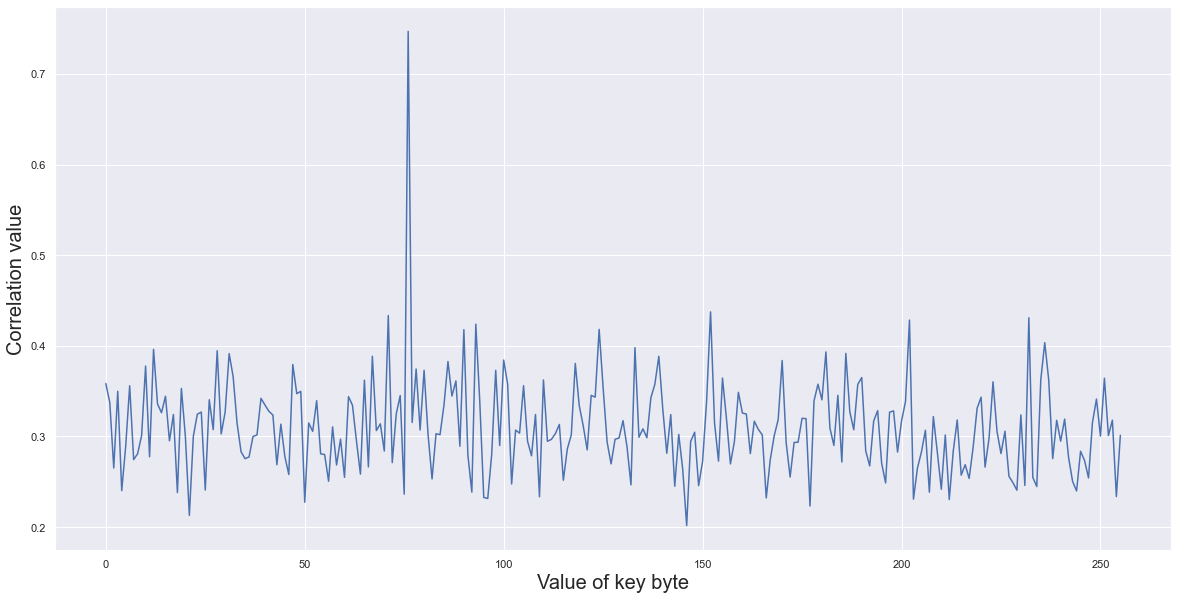

In [205]:
# time to plot a graph for a key byte: x-axis: value of key byte, y-axis: correlation value

import seaborn
seaborn.set(rc={'figure.figsize':(20,10)})
plot = seaborn.lineplot(data=highestvaluearray)
plot.set_xlabel("Value of key byte", fontsize = 20)
plot.set_ylabel("Correlation value", fontsize = 20)
print(max(highestvaluearray))
for i in range(0,256):
    if highestvaluearray[i]==max(highestvaluearray):
        print(hex(i))